In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('canada_per_capita_income.csv')

In [4]:
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


### by sklearn

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 884.0 bytes


Text(0, 0.5, 'INCOME(in $)')

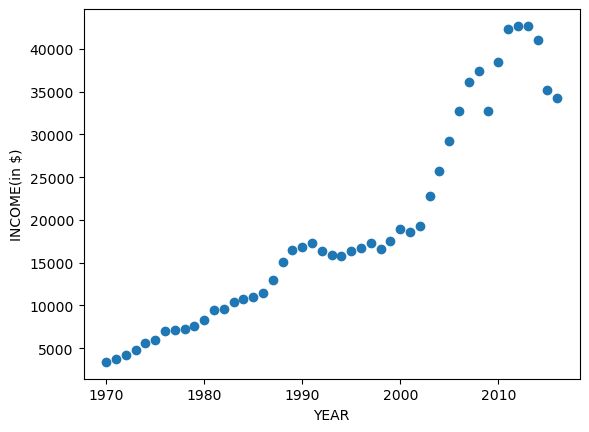

In [7]:
plt.scatter(df['year'],df['per capita income (US$)'])
plt.xlabel('YEAR')
plt.ylabel('INCOME(in $)')

In [8]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [9]:
y.head()

0    3399.299037
1    3768.297935
2    4251.175484
3    4804.463248
4    5576.514583
Name: per capita income (US$), dtype: float64

In [11]:
X.head()

,year
0,1970
1,1971
2,1972
3,1973
4,1974


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr = LinearRegression()

In [15]:
lr.fit(X_train,y_train)

LinearRegression()

In [16]:
X_test.head()

,year
23,1993
12,1982
42,2012
16,1986
35,2005


In [17]:
y_test.head()

23    15875.586730
12     9619.438377
42    42665.255970
16    11482.891530
35    29198.055690
Name: per capita income (US$), dtype: float64

In [18]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

D:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([18602.90731472])

Text(0, 0.5, 'INCOME(in $)')

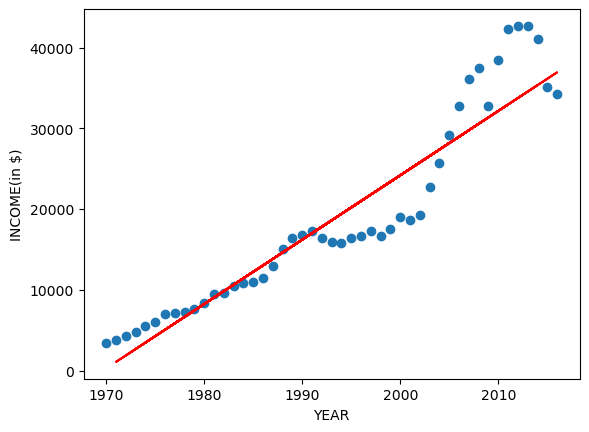

In [20]:
plt.scatter(df['year'],df['per capita income (US$)'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('YEAR')
plt.ylabel('INCOME(in $)')

In [21]:
m = lr.coef_

In [23]:
m

array([796.93681988])

In [24]:
b = lr.intercept_

In [25]:
b

-1569692.1747126186

### by formula

In [27]:
dm=pd.read_csv('canada_per_capita_income.csv')

In [28]:
dm.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


Text(0, 0.5, 'INCOME(in $)')

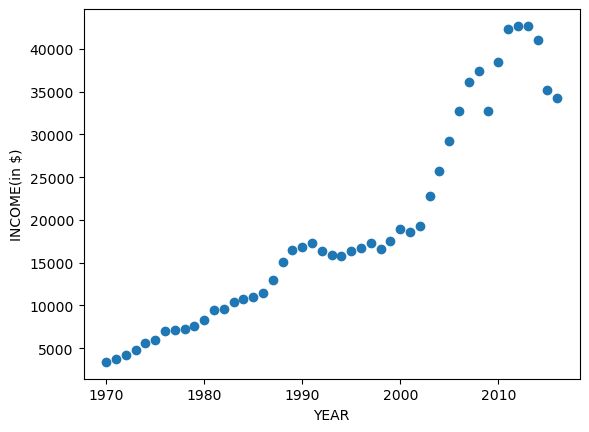

In [29]:
plt.scatter(dm['year'],dm['per capita income (US$)'])
plt.xlabel('YEAR')
plt.ylabel('INCOME(in $)')

In [35]:
X = dm.iloc[:,0].values
y = dm.iloc[:,1].values

In [38]:
X

array([[1970],
       [1971],
       [1972],
       [1973],
       [1974],
       [1975],
       [1976],
       [1977],
       [1978],
       [1979],
       [1980],
       [1981],
       [1982],
       [1983],
       [1984],
       [1985],
       [1986],
       [1987],
       [1988],
       [1989],
       [1990],
       [1991],
       [1992],
       [1993],
       [1994],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016]], dtype=int64)

In [39]:
y

array([ 3399.299037,  3768.297935,  4251.175484,  4804.463248,
        5576.514583,  5998.144346,  7062.131392,  7100.12617 ,
        7247.967035,  7602.912681,  8355.96812 ,  9434.390652,
        9619.438377, 10416.53659 , 10790.32872 , 11018.95585 ,
       11482.89153 , 12974.80662 , 15080.28345 , 16426.72548 ,
       16838.6732  , 17266.09769 , 16412.08309 , 15875.58673 ,
       15755.82027 , 16369.31725 , 16699.82668 , 17310.75775 ,
       16622.67187 , 17581.02414 , 18987.38241 , 18601.39724 ,
       19232.17556 , 22739.42628 , 25719.14715 , 29198.05569 ,
       32738.2629  , 36144.48122 , 37446.48609 , 32755.17682 ,
       38420.52289 , 42334.71121 , 42665.25597 , 42676.46837 ,
       41039.8936  , 35175.18898 , 34229.19363 ])

In [40]:
class MeraLR:

    def __init__(self):
        self.m = None
        self.b = None

    def fit(self,X_train,y_train):

        num = 0
        den = 0

        for i in range(X_train.shape[0]):

            num = num + ((X_train[i] - X_train.mean())*(y_train[i] - y_train.mean()))
            den = den + ((X_train[i] - X_train.mean())*(X_train[i] - X_train.mean()))

        self.m = num/den
        self.b = y_train.mean() - (self.m * X_train.mean())
        print(self.m)
        print(self.b)

    def predict(self,X_test):

        print(X_test)

        return self.m * X_test + self.b

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [42]:
X_train.shape

(37, 1)

In [43]:
lr = MeraLR()

In [44]:
lr.fit(X_train,y_train)

[796.93681988]
[-1569692.17471262]


In [45]:
X_train.shape[0]

37

In [46]:
X_train[0]

array([1972], dtype=int64)

In [47]:
X_train.mean()

1992.6486486486488

In [48]:
X_test[0]

array([1993], dtype=int64)

In [49]:
print(lr.predict(X_test[0]))

[1993]
[18602.90731472]
